In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.drop('customerID', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')   #changing data type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())  #dealing with missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


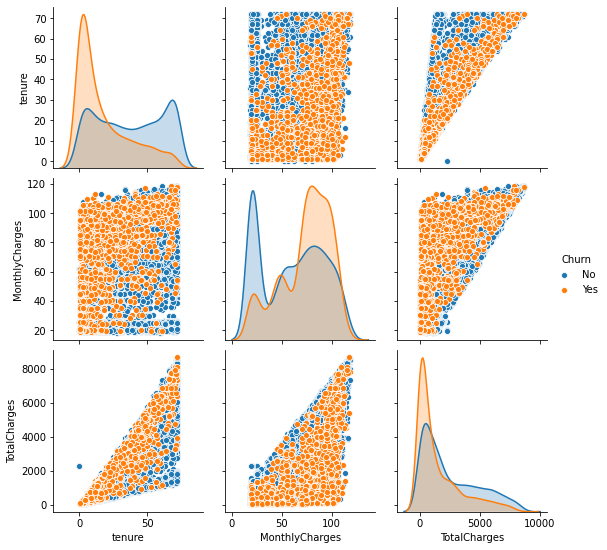

In [ ]:
sns.pairplot(data, hue = 'Churn', vars = ['tenure', 'MonthlyCharges', 'TotalCharges'])

In [ ]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [ ]:
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])] ,remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
#X = ohe.fit_transform(X)
print(X)

[[0.0000e+00 1.0000e+00 1.0000e+00 ... 1.0000e+00 2.9850e+01 2.9850e+01]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 3.4000e+01 5.6950e+01 1.8895e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 2.0000e+00 5.3850e+01 1.0815e+02]
 ...
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 1.1000e+01 2.9600e+01 3.4645e+02]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 4.0000e+00 7.4400e+01 3.0660e+02]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 6.6000e+01 1.0565e+02 6.8445e+03]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y = le.fit_transform(y)
print(y)
print(y.shape)

[0 0 1 ... 0 1 0]
(7043,)


In [ ]:
y.reshape(7043,1).shape

(7043, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[ 0.99257284 -0.99257284 -0.99257284 ... -0.82588395 -1.49752994
  -0.89301894]
 [-1.00748273  1.00748273  1.00748273 ...  0.39596106  0.30299568
   0.38854112]
 [ 0.99257284 -0.99257284 -0.99257284 ...  1.57707791  0.01232042
   1.06027606]
 ...
 [ 0.99257284 -0.99257284 -0.99257284 ... -0.17423328  1.35939264
   0.30859265]
 [ 0.99257284 -0.99257284 -0.99257284 ... -1.23316563 -0.3447949
  -0.95671719]
 [-1.00748273  1.00748273  1.00748273 ... -0.66297128  0.11530251
  -0.51480373]]


In [ ]:
x_train.shape

(5634, 62)

[[940 121]
 [144 204]]
0.8119233498935415
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.59      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409



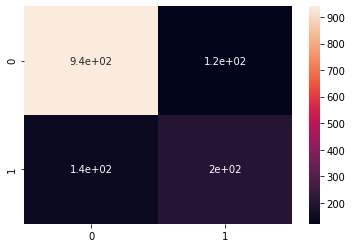

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 10000)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[836 225]
 [153 195]]
0.7317246273953159
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1061
           1       0.46      0.56      0.51       348

    accuracy                           0.73      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.75      0.73      0.74      1409



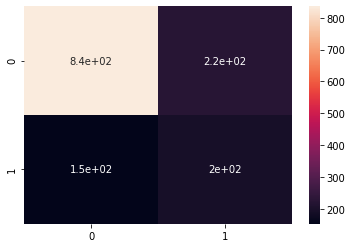

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[933 128]
 [165 183]]
0.7920511000709723
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1061
           1       0.59      0.53      0.56       348

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.79      0.79      0.79      1409



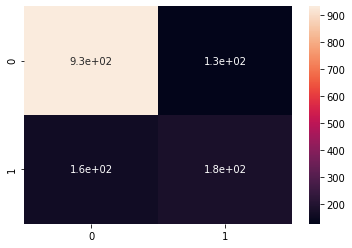

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[701 360]
 [ 46 302]]
0.7118523775727467
              precision    recall  f1-score   support

           0       0.94      0.66      0.78      1061
           1       0.46      0.87      0.60       348

    accuracy                           0.71      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.82      0.71      0.73      1409



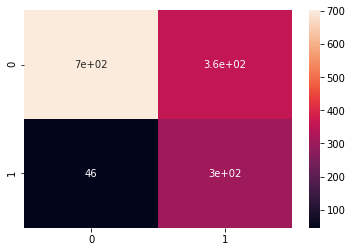

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[946 115]
 [158 190]]
0.8062455642299503
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.62      0.55      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



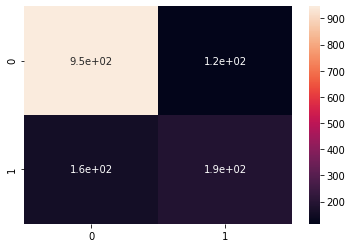

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = {'C':[1,10,100],
              'kernel':['sigmoid','linear','rbf'],
              'gamma':[0.01,0.001,0.1]}

In [ ]:
gs = GridSearchCV(estimator=classifier,
                  param_grid = grid_param,
                  refit = True,
                  verbose=4)

In [ ]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, gamma=0.01, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.764, total=   1.9s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.768, total=   1.9s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.776, total=   1.7s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s remaining:    0.0s


[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.784, total=   1.7s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] ..... C=1, gamma=0.01, kernel=sigmoid, score=0.764, total=   1.7s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.800, total=   2.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.790, total=   2.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.802, total=   2.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.810, total=   2.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, gamma=0.01, kernel=linear, score=0.785, total=   2.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 16.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.1],
                         'kernel': ['sigmoid', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [ ]:
gs.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[947 114]
 [160 188]]
0.8055358410220014
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.62      0.54      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



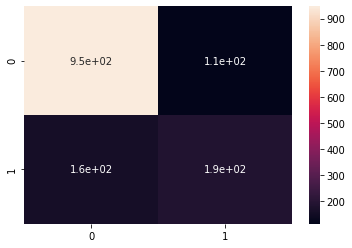

In [ ]:
y_pred = gs.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))